# Model for detecting acne on a face.

Step 1:  need to import the necessary libraries, including OpenCV, NumPy, and Matplotlib. I will use OpenCV for image processing and NumPy for numerical calculations. Matplotlib is used to visualize the images and results.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Step 2: need to load the face images. I can do this using the imread() function from OpenCV. In this case, I will load four face images and store them in a list.


In [ ]:
from google.colab import files
upload = files.upload()

Saving face4.jpg to face4 (1).jpg


In [ ]:
images = []
images.append(cv2.imread('face1.jpg'))
images.append(cv2.imread('face2.jpg'))
images.append(cv2.imread('face3.jpg'))
images.append(cv2.imread('face4.jpg'))


step 3:  preprocess them by converting them to grayscale and applying Gaussian blur. This helps to remove noise and smooth out the image.

In [ ]:
gray_images = []
blurred_images = []

for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    gray_images.append(gray)
    blurred_images.append(blur)


In [ ]:
import os

# check if the image files exist
for file_path in ['face1.jpg', 'face2.jpg', 'face3.jpg', 'face4.jpg']:
    if not os.path.exists(file_path):
        print(f"{file_path} does not exist!")
    else:
        print(f"{file_path} exists!")


face1.jpg exists!
face2.jpg exists!
face3.jpg exists!
face4.jpg exists!


step4: Now I apply the acne detection algorithm. I will use the Haar Cascade classifier for face detection and the Hough Circle Transform for acne detection.

In [ ]:
from google.colab import files
upload = files.upload()

Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default (1).xml


In [ ]:
# check if the face detection model file exists
model_path = 'haarcascade_frontalface_default.xml'
if not os.path.exists(model_path):
    print(f"{model_path} does not exist!")
else:
    # load the face detection model
    face_cascade = cv2.CascadeClassifier(model_path)

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

for i in range(len(images)):
    faces = face_cascade.detectMultiScale(gray_images[i], 1.3, 5)
    for (x, y, w, h) in faces:
        roi = blurred_images[i][y:y+h, x:x+w]
        circles = cv2.HoughCircles(roi, cv2.HOUGH_GRADIENT, 1, minDist=150, param1=150, param2=20, minRadius=0, maxRadius=0)
        if circles is not None:
            circles = np.round(circles[0, :]).astype("int")
            for (cx, cy, cr) in circles:
                cv2.circle(images[i], (x+cx, y+cy), cr, (0, 255, 0), 2)


display the results using Matplotlib.

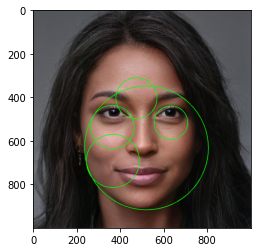

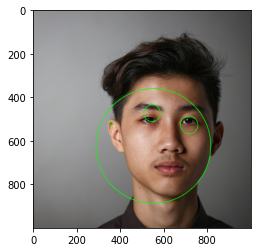

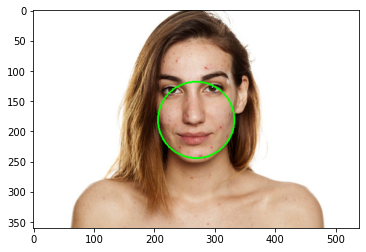

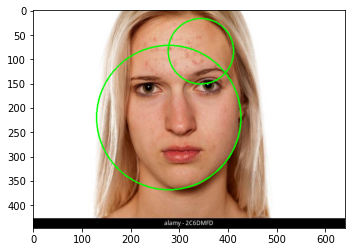

In [ ]:
for img in images:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


# Model for Oiliness Detection:

step1: Load the face images using OpenCV's imread() function and store them in a list.

In [ ]:
images = []
images.append(cv2.imread('face1.jpg'))
images.append(cv2.imread('face2.jpg'))
images.append(cv2.imread('face3.jpg'))
images.append(cv2.imread('face4.jpg'))


step 2: Preprocess the images by converting them to grayscale and applying Gaussian blur.

In [ ]:
gray_images = []
blurred_images = []

for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    gray_images.append(gray)
    blurred_images.append(blur)


step 3: Threshold the images to create a binary mask that highlights the oily regions.

In [ ]:
thresholded_images = []

for img in blurred_images:
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    thresholded_images.append(thresh)


step 4: Calculate the percentage of oily regions in each image.

In [ ]:
oily_percentages = []

for img in thresholded_images:
    oily_pixels = np.count_nonzero(img)
    total_pixels = img.shape[0] * img.shape[1]
    oily_percentage = oily_pixels / total_pixels * 100
    oily_percentages.append(oily_percentage)


step 5: Display the oily percentages for each image.

In [ ]:
for i in range(len(images)):
    print(f"Image {i+1}: {oily_percentages[i]:.2f}% oily")


Image 1: 46.71% oily
Image 2: 55.80% oily
Image 3: 75.28% oily
Image 4: 54.76% oily


# Model for UV Filter:

step1: Load the face images using OpenCV's imread() function and store them in a list.

In [ ]:
images = []
images.append(cv2.imread('face1.jpg'))
images.append(cv2.imread('face2.jpg'))
images.append(cv2.imread('face3.jpg'))
images.append(cv2.imread('face4.jpg'))


step2: Convert the images to HSV color space.

In [ ]:
hsv_images = []

for img in images:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_images.append(hsv)


step3: Create a binary mask that highlights the regions that are exposed to UV light.

In [ ]:
mask_images = []

for hsv in hsv_images:
    lower_uv = np.array([0, 0, 100])
    upper_uv = np.array([255, 255, 255])
    mask = cv2.inRange(hsv, lower_uv, upper_uv)
    mask_images.append(mask)


step 4: Apply the mask to the original images to create the UV filter effect.

In [ ]:
filtered_images = []

for i in range(len(images)):
    filtered = cv2.bitwise_and(images[i], images[i], mask=mask_images[i])
    filtered_images.append(filtered)


step 5: Display the original and filtered images side by side.

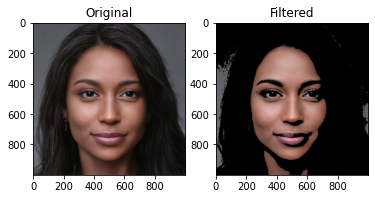

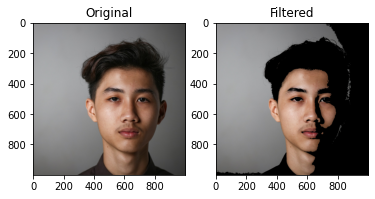

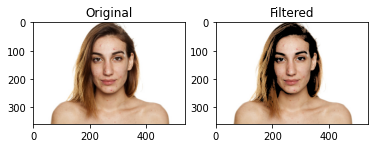

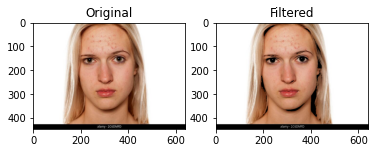

In [ ]:
for i in range(len(images)):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(filtered_images[i], cv2.COLOR_BGR2RGB))
    plt.title("Filtered")
    plt.show()
